In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [227]:
train=pd.read_csv('Train.csv')
test=pd.read_csv('Test.csv')

In [228]:
train.shape , test.shape

((692, 2), (90, 1))

In [229]:
train.tail()

,Day,GrocerySales
687,688,8848.98
688,689,8800.45
689,690,9197.99
690,691,9062.44
691,692,8963.12


In [230]:
train.drop('Day',inplace=True,axis=1)

In [231]:
train.head()

,GrocerySales
0,8418.59
1,8447.47
2,8336.49
3,8579.17
4,8524.31


In [226]:
train['GrocerySales Difference']=train['GrocerySales']-train['GrocerySales'].shift(5)

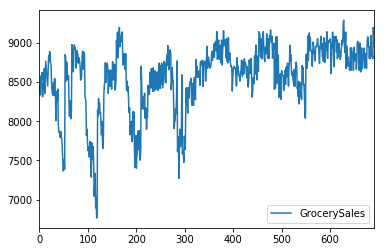

In [232]:
train.plot()

In [233]:
from statsmodels.tsa.stattools import adfuller

In [234]:
test_result=adfuller(train['GrocerySales'])

In [235]:
def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [238]:
adfuller_test(train['GrocerySales'])

ADF Test Statistic : -4.316545880313042
p-value : 0.00041580115914319714
#Lags Used : 2
Number of Observations Used : 689
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


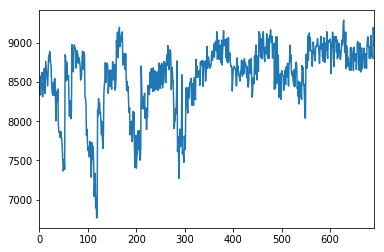

In [239]:
train['GrocerySales'].plot()

# Auto Regressive Model

In [240]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm

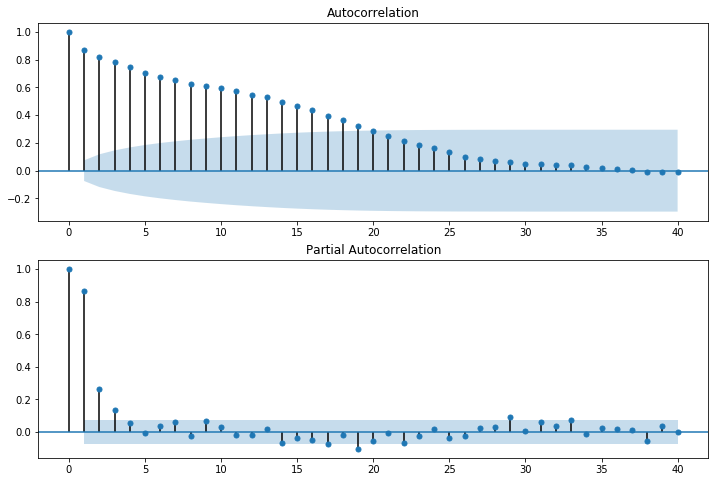

In [241]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(train['GrocerySales'],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(train['GrocerySales'],lags=40,ax=ax2)

In [206]:
model=sm.tsa.statespace.SARIMAX(train['GrocerySales'],order=(5,1,20),enforce_invertibility=False,
                                enforce_stationarity=False)
mod_fit=model.fit()

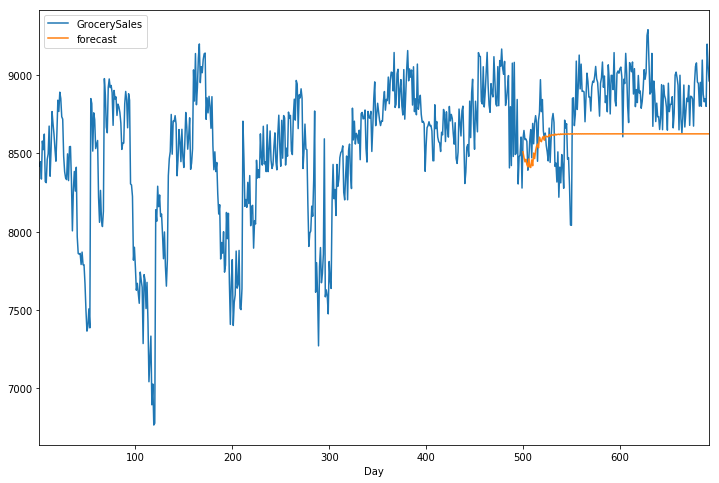

In [207]:
train['forecast']=mod_fit.predict(start=500,end=692,dynamic=True)
train[['GrocerySales','forecast']].plot(figsize=(12,8))

In [208]:
df=pd.concat([train,test])

In [209]:
df.set_index('Day',inplace=True)

In [210]:
df.tail()

,GrocerySales,GrocerySales Difference,forecast
Day,,,
778.0,NaN,NaN,NaN
779.0,NaN,NaN,NaN
780.0,NaN,NaN,NaN
781.0,NaN,NaN,NaN
782.0,NaN,NaN,NaN


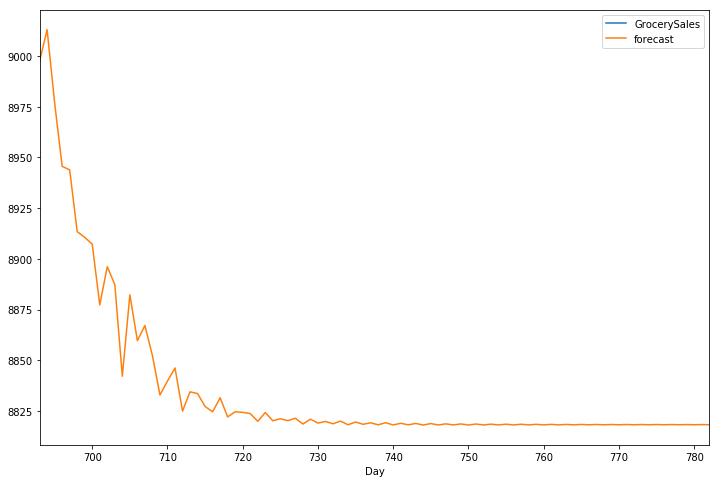

In [211]:
df['forecast'] = mod_fit.predict(start = 692, end = 783, dynamic= True)  
df[['GrocerySales', 'forecast']].plot(figsize=(12, 8))

In [212]:
df.tail()

,GrocerySales,GrocerySales Difference,forecast
Day,,,
778.0,NaN,NaN,8818.138086
779.0,NaN,NaN,8818.229630
780.0,NaN,NaN,8818.143159
781.0,NaN,NaN,8818.224156
782.0,NaN,NaN,8818.147371


In [213]:
re=df[693:]
re=re.reset_index()
re.head()

,Day,GrocerySales,GrocerySales Difference,forecast
0,693.0,NaN,NaN,8997.483026
1,694.0,NaN,NaN,9013.057854
2,695.0,NaN,NaN,8977.044192
3,696.0,NaN,NaN,8945.639922
4,697.0,NaN,NaN,8943.897889


In [214]:
re.drop(['Day','GrocerySales Difference','GrocerySales'],axis=1,inplace=True)

In [215]:
re['GrocerySales']=re['forecast']

In [216]:
re.drop('forecast',axis=1,inplace=True)

In [217]:
re.tail()

,GrocerySales
85,8818.138086
86,8818.229630
87,8818.143159
88,8818.224156
89,8818.147371


In [218]:
re.to_excel('sample_8.xlsx',index=False)